In [1]:
import os
import numpy as np
import h5py
import scipy.io
np.random.seed(7) # for reproducibility

import keras.backend as K
from keras.models import Model, load_model

import matplotlib.pyplot as plt
import matplotlib
#from concise.utils.plot import seqlogo, seqlogo_fig

import sys
sys.path.append("./Scripts/")
from IntegratedGradients import *
from util_funcs import *
from plotseqlogo import seqlogo, seqlogo_fig

Using TensorFlow backend.
./Scripts/plotseqlogo.py:44: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  min_coords = np.vstack(data.min(0) for data in polygons_data).min(0)
./Scripts/plotseqlogo.py:45: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  max_coords = np.vstack(data.max(0) for data in polygons_data).max(0)


In [2]:
### library to use R
%load_ext rpy2.ipython
%load_ext rmagic

/anaconda3/lib/python3.7/site-packages/IPython/extensions/rmagic.py:11: UserWarning: The rmagic extension in IPython has moved to `rpy2.ipython`, please see `rpy2` documentation.
  warnings.warn("The rmagic extension in IPython has moved to "


In [3]:
path_to_data = "/Users/storm/reproduce/input_combination/data/"
path_to_datalow = path_to_data + "data_RBPslow.h5"
X_test_seq_low,X_test_annotation_low, X_test_region_low, y_test_RBP_low, y_test_name_low, y_train_low = load_data(path_to_datalow)
print (X_test_seq_low.shape)
print (X_test_annotation_low.shape)
print (X_test_region_low.shape)
print (y_test_RBP_low.shape)
print (y_test_name_low.shape)
print (y_train_low.shape)

(7969, 150, 4)
(7969, 150, 6)
(7969, 250, 4)
(7969, 27)
(7969,)
(56547, 27)


In [4]:
#load models and obtain prediction and integrated_gradients
path_to_model = "./"
path_to_model_seq= path_to_model + "seq_RBPslow.h5"
path_to_model_struc= path_to_model + "struc_RBPslow.h5"
path_to_model_region= path_to_model + "region_RBPslow.h5"
path_to_model_seq_struc= path_to_model + "model_seq_struc_RBPslow.h5"
path_to_model_seq_region= path_to_model + "model_seq_region_RBPslow.h5"
path_to_model_struc_region= path_to_model + "model_struc_region_RBPslow.h5"
path_to_model_seq_struc_region= path_to_model + "model_seq_struc_region_RBPslow.h5"

In [5]:
model_seq=load_model(path_to_model_seq, custom_objects={'precision': precision,'recall': recall }) 
pred_seq=model_seq.predict(X_test_seq_low)

Instructions for updating:
Colocations handled automatically by placer.


2020-11-19 19:34:51,128 [WARNING] From /anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/resource_variable_ops.py:435: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Use tf.cast instead.


2020-11-19 19:34:51,523 [WARNING] From /anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_ops.py:3066: to_int32 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.


In [6]:
model_struc=load_model(path_to_model_struc, custom_objects={'precision': precision,'recall': recall }) 
pred_struc=model_struc.predict(X_test_annotation_low)

In [7]:
model_region=load_model(path_to_model_region, custom_objects={'precision': precision,'recall': recall }) 
pred_region=model_region.predict(X_test_region_low)

In [8]:
model_seq_struc=load_model(path_to_model_seq_struc, custom_objects={'precision': precision,'recall': recall }) 
pred_seq_struc=model_seq_struc.predict([X_test_seq_low, X_test_annotation_low])

In [9]:
model_seq_region=load_model(path_to_model_seq_region, custom_objects={'precision': precision,'recall': recall }) 
pred_seq_region=model_seq_region.predict([X_test_seq_low, X_test_region_low])

In [10]:
model_struc_region=load_model(path_to_model_struc_region, custom_objects={'precision': precision,'recall': recall }) 
pred_struc_region=model_struc_region.predict([X_test_annotation_low, X_test_region_low])

In [11]:
model_seq_struc_region=load_model(path_to_model_seq_struc_region, custom_objects={'precision': precision,'recall': recall }) 
pred_seq_struc_region=model_seq_struc_region.predict([X_test_seq_low, X_test_annotation_low, X_test_region_low])

In [12]:
#RBPnames for each model
RBPnames_low=np.array(['MBNL1', 'P53_NONO', 'PUM2', 'QKI', 'AGO3', 'FUS', 'TAF15', 'ZFP36', 'DICER1', 'EIF3A', 'EIF3D', 'EIF3G', 'SSB', 'PAPD5', 'CPSF4', 'CPSF3', 'RTCB', 'FXR1', 'NOP58', 'NOP56', 'FBL', 'LIN28A', 'LIN28B', 'UPF1', 'G35', 'G45', 'XPO5'])

In [13]:
#number of tasks for each model
num_task_low=len(RBPnames_low)

In [14]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import numpy as np
from matplotlib.font_manager import FontProperties
import matplotlib as mpl
import matplotlib

In [15]:
y_true=y_test_RBP_low
type(y_true) == np.ndarray
y_pred_seq=pred_seq
y_pred_struc=pred_struc
y_pred_region=pred_region
y_pred_seq_struc=pred_seq_struc
y_pred_seq_region=pred_seq_region
y_pred_struc_region=pred_struc_region
y_pred_seq_struc_region=pred_seq_struc_region

In [16]:
precision_low = l = [None] * len(RBPnames_low)
recall_low = [None] * len(RBPnames_low)
average_precision_low = [None] * len(RBPnames_low)

fpr_low = [None] * len(RBPnames_low)
tpr_low = [None] * len(RBPnames_low)
roc_auc_low = [None] * len(RBPnames_low)
pr_auc_low = [None] * len(RBPnames_low)

for i in range(num_task_low):
    precision_low[i], recall_low[i], _ = precision_recall_curve(y_true[:, i],y_pred_seq[:, i])
    average_precision_low[i] = average_precision_score(y_true[:, i], y_pred_seq[:, i])
    pr_auc_low [i]= auc(recall_low[i],precision_low[i])
    fpr_low[i], tpr_low[i], _ = roc_curve(y_true[:, i], y_pred_seq[:, i])
    roc_auc_low[i] = auc(fpr_low[i], tpr_low[i])
average_precision_seq = average_precision_low
roc_auc_seq = roc_auc_low

In [17]:
precision_low = l = [None] * len(RBPnames_low)
recall_low = [None] * len(RBPnames_low)
average_precision_low = [None] * len(RBPnames_low)

fpr_low = [None] * len(RBPnames_low)
tpr_low = [None] * len(RBPnames_low)
roc_auc_low = [None] * len(RBPnames_low)
pr_auc_low = [None] * len(RBPnames_low)

for i in range(num_task_low):
    precision_low[i], recall_low[i], _ = precision_recall_curve(y_true[:, i],y_pred_struc[:, i])
    average_precision_low[i] = average_precision_score(y_true[:, i], y_pred_struc[:, i])
    pr_auc_low [i]= auc(recall_low[i],precision_low[i])
    fpr_low[i], tpr_low[i], _ = roc_curve(y_true[:, i], y_pred_struc[:, i])
    roc_auc_low[i] = auc(fpr_low[i], tpr_low[i])
average_precision_struc = average_precision_low
roc_auc_struc = roc_auc_low

In [18]:
precision_low = l = [None] * len(RBPnames_low)
recall_low = [None] * len(RBPnames_low)
average_precision_low = [None] * len(RBPnames_low)

fpr_low = [None] * len(RBPnames_low)
tpr_low = [None] * len(RBPnames_low)
roc_auc_low = [None] * len(RBPnames_low)
pr_auc_low = [None] * len(RBPnames_low)

for i in range(num_task_low):
    precision_low[i], recall_low[i], _ = precision_recall_curve(y_true[:, i],y_pred_region[:, i])
    average_precision_low[i] = average_precision_score(y_true[:, i], y_pred_region[:, i])
    pr_auc_low [i]= auc(recall_low[i],precision_low[i])
    fpr_low[i], tpr_low[i], _ = roc_curve(y_true[:, i], y_pred_region[:, i])
    roc_auc_low[i] = auc(fpr_low[i], tpr_low[i])
average_precision_region = average_precision_low
roc_auc_region = roc_auc_low

In [19]:
precision_low = l = [None] * len(RBPnames_low)
recall_low = [None] * len(RBPnames_low)
average_precision_low = [None] * len(RBPnames_low)

fpr_low = [None] * len(RBPnames_low)
tpr_low = [None] * len(RBPnames_low)
roc_auc_low = [None] * len(RBPnames_low)
pr_auc_low = [None] * len(RBPnames_low)

for i in range(num_task_low):
    precision_low[i], recall_low[i], _ = precision_recall_curve(y_true[:, i],y_pred_seq_struc[:, i])
    average_precision_low[i] = average_precision_score(y_true[:, i], y_pred_seq_struc[:, i])
    pr_auc_low [i]= auc(recall_low[i],precision_low[i])
    fpr_low[i], tpr_low[i], _ = roc_curve(y_true[:, i], y_pred_seq_struc[:, i])
    roc_auc_low[i] = auc(fpr_low[i], tpr_low[i])
average_precision_seq_struc = average_precision_low
roc_auc_seq_struc = roc_auc_low

In [20]:
precision_low = l = [None] * len(RBPnames_low)
recall_low = [None] * len(RBPnames_low)
average_precision_low = [None] * len(RBPnames_low)

fpr_low = [None] * len(RBPnames_low)
tpr_low = [None] * len(RBPnames_low)
roc_auc_low = [None] * len(RBPnames_low)
pr_auc_low = [None] * len(RBPnames_low)

for i in range(num_task_low):
    precision_low[i], recall_low[i], _ = precision_recall_curve(y_true[:, i],y_pred_seq_region[:, i])
    average_precision_low[i] = average_precision_score(y_true[:, i], y_pred_seq_region[:, i])
    pr_auc_low [i]= auc(recall_low[i],precision_low[i])
    fpr_low[i], tpr_low[i], _ = roc_curve(y_true[:, i], y_pred_seq_region[:, i])
    roc_auc_low[i] = auc(fpr_low[i], tpr_low[i])
average_precision_seq_region = average_precision_low
roc_auc_seq_region = roc_auc_low

In [21]:
precision_low = l = [None] * len(RBPnames_low)
recall_low = [None] * len(RBPnames_low)
average_precision_low = [None] * len(RBPnames_low)

fpr_low = [None] * len(RBPnames_low)
tpr_low = [None] * len(RBPnames_low)
roc_auc_low = [None] * len(RBPnames_low)
pr_auc_low = [None] * len(RBPnames_low)

for i in range(num_task_low):
    precision_low[i], recall_low[i], _ = precision_recall_curve(y_true[:, i],y_pred_struc_region[:, i])
    average_precision_low[i] = average_precision_score(y_true[:, i], y_pred_struc_region[:, i])
    pr_auc_low [i]= auc(recall_low[i],precision_low[i])
    fpr_low[i], tpr_low[i], _ = roc_curve(y_true[:, i], y_pred_struc_region[:, i])
    roc_auc_low[i] = auc(fpr_low[i], tpr_low[i])
average_precision_struc_region = average_precision_low
roc_auc_struc_region = roc_auc_low

In [22]:
precision_low = l = [None] * len(RBPnames_low)
recall_low = [None] * len(RBPnames_low)
average_precision_low = [None] * len(RBPnames_low)

fpr_low = [None] * len(RBPnames_low)
tpr_low = [None] * len(RBPnames_low)
roc_auc_low = [None] * len(RBPnames_low)
pr_auc_low = [None] * len(RBPnames_low)

for i in range(num_task_low):
    precision_low[i], recall_low[i], _ = precision_recall_curve(y_true[:, i],y_pred_seq_struc_region[:, i])
    average_precision_low[i] = average_precision_score(y_true[:, i], y_pred_seq_struc_region[:, i])
    pr_auc_low [i]= auc(recall_low[i],precision_low[i])
    fpr_low[i], tpr_low[i], _ = roc_curve(y_true[:, i], y_pred_seq_struc_region[:, i])
    roc_auc_low[i] = auc(fpr_low[i], tpr_low[i])
average_precision_seq_struc_region = average_precision_low
roc_auc_seq_struc_region = roc_auc_low

In [23]:
import pandas as pd
df_AP = pd.DataFrame(np.zeros(num_task_low*8).reshape(num_task_low,8),
                  columns=['RBPnames','seq', 'struc', 'region','seq_struc','seq_region','struc_region','seq_struc_region'])
df_AP.loc[:, 'RBPnames'] = RBPnames_low
df_AP.loc[:, 'seq'] = average_precision_seq
df_AP.loc[:, 'struc'] = average_precision_struc
df_AP.loc[:, 'region'] = average_precision_region
df_AP.loc[:, 'seq_struc'] = average_precision_seq_struc
df_AP.loc[:, 'seq_region'] = average_precision_seq_region
df_AP.loc[:, 'struc_region'] = average_precision_struc_region
df_AP.loc[:, 'seq_struc_region'] = average_precision_seq_struc_region
df_AP.to_csv('AP_value_DeepRiPe.csv')
df = df_AP.melt(id_vars=['RBPnames'])
df.head ()

,RBPnames,variable,value
0,MBNL1,seq,0.939708
1,P53_NONO,seq,0.276733
2,PUM2,seq,0.663683
3,QKI,seq,0.618811
4,AGO3,seq,0.436121


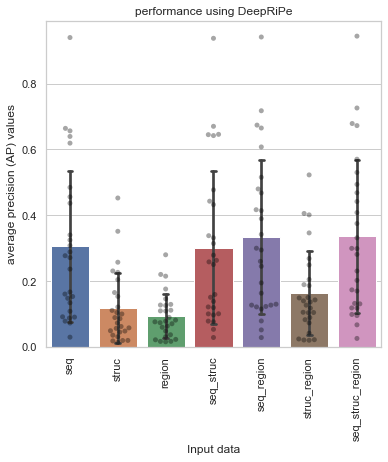

In [25]:
import seaborn as sns
f = plt.figure(figsize = (6,6))
sns.set(style="whitegrid")
sns.barplot(x="variable", y="value", data=df, capsize=.1, ci="sd")
sns.swarmplot(x="variable", y="value", data=df, color="0", alpha=.35)
#f.savefig("input_data_AP_values.pdf", bbox_inches='tight')
plt.xlabel('Input data')
plt.ylabel("average precision (AP) values")
plt.title("performance using DeepRiPe")
plt.xticks(rotation = 90)
plt.show()

In [27]:
df_AUROC = pd.DataFrame(np.zeros(num_task_low*8).reshape(num_task_low,8),
                  columns=['RBPnames','seq', 'struc', 'region','seq_struc','seq_region','struc_region','seq_struc_region'])
df_AUROC.loc[:, 'RBPnames'] = RBPnames_low
df_AUROC.loc[:, 'seq'] = roc_auc_seq
df_AUROC.loc[:, 'struc'] = roc_auc_struc
df_AUROC.loc[:, 'region'] = roc_auc_region
df_AUROC.loc[:, 'seq_struc'] = roc_auc_seq_struc
df_AUROC.loc[:, 'seq_region'] = roc_auc_seq_region
df_AUROC.loc[:, 'struc_region'] = roc_auc_struc_region
df_AUROC.loc[:, 'seq_struc_region'] = roc_auc_seq_struc_region
df = df_AUROC.melt(id_vars=['RBPnames'])
df.head ()

,RBPnames,variable,value
0,MBNL1,seq,0.981691
1,P53_NONO,seq,0.885568
2,PUM2,seq,0.928620
3,QKI,seq,0.971991
4,AGO3,seq,0.850336


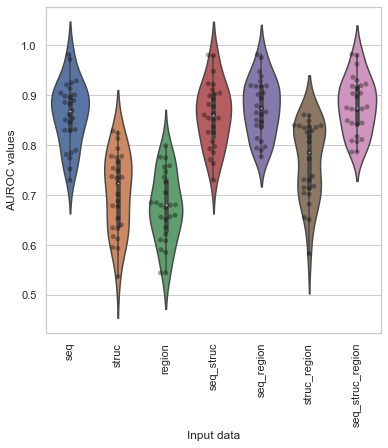

In [28]:
f = plt.figure(figsize = (6,6))
sns.set(style="whitegrid")
sns.violinplot(x="variable", y="value", data=df, capsize=.1, ci="sd")
sns.swarmplot(x="variable", y="value", data=df, color="0", alpha=.35)
#f.savefig("Input_data_AUROC_values.pdf", bbox_inches='tight')
plt.xlabel('Input data')
plt.ylabel("AUROC values")
plt.xticks(rotation = 90)
plt.show()

(2, 4)


2020-11-12 17:00:47,386 [WARNING] No handles with labels found to put in legend.


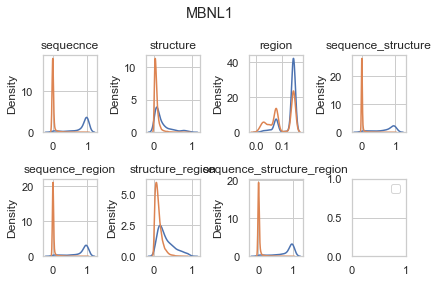

In [33]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
RBPname="MBNL1" 
RBPnames=RBPnames_low
RBP_index = np.where(RBPnames==RBPname)[0][0]
y_test_RBP = y_test_RBP_low
posind = [i for i in range(y_test_RBP.shape[0]) if y_test_RBP[i,RBP_index]==1 ]
negind = [i for i in range(y_test_RBP.shape[0]) if y_test_RBP[i,RBP_index]==0 ]
fig, axes = plt.subplots(2, 4)
fig.suptitle(RBPname)
pred=pred_seq
print (axes.shape)
axes[0,0].set_title("sequecnce")
sns.distplot(pred[posind,RBP_index],label='Positive samples',hist=False, ax=axes[0,0])
sns.distplot(pred[negind,RBP_index],label='Negative samples',hist=False, ax=axes[0,0])
pred=pred_struc
axes[0,1].set_title("structure")
sns.distplot(pred[posind,RBP_index],label='Positive samples',hist=False, ax=axes[0,1])
sns.distplot(pred[negind,RBP_index],label='Negative samples',hist=False, ax=axes[0,1])
pred=pred_region
axes[0,2].set_title("region")
sns.distplot(pred[posind,RBP_index],label='Positive samples',hist=False, ax=axes[0,2])
sns.distplot(pred[negind,RBP_index],label='Negative samples',hist=False, ax=axes[0,2])
pred=pred_seq_struc
axes[0,3].set_title("sequence_structure")
sns.distplot(pred[posind,RBP_index],label='Positive samples',hist=False, ax=axes[0,3])
sns.distplot(pred[negind,RBP_index],label='Negative samples',hist=False, ax=axes[0,3])
pred=pred_seq_region
axes[1,0].set_title("sequence_region")
sns.distplot(pred[posind,RBP_index],label='Positive samples',hist=False, ax=axes[1,0])
sns.distplot(pred[negind,RBP_index],label='Negative samples',hist=False, ax=axes[1,0])
pred=pred_struc_region
axes[1,1].set_title("structure_region")
sns.distplot(pred[posind,RBP_index],label='Positive samples',hist=False, ax=axes[1,1])
sns.distplot(pred[negind,RBP_index],label='Negative samples',hist=False, ax=axes[1,1])
pred=pred_seq_struc_region
axes[1,2].set_title("sequence_structure_region")
sns.distplot(pred[posind,RBP_index],label='Positive samples',hist=False, ax=axes[1,2])
sns.distplot(pred[negind,RBP_index],label='Negative samples',hist=False, ax=axes[1,2])
plt.legend()
plt.tight_layout()
plt.show()

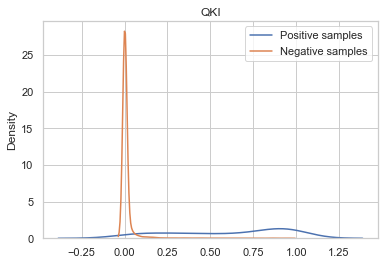

In [34]:
y_test_RBP=y_test_RBP_low
pred=pred_seq_struc

RBPname="QKI" 
RBPnames=RBPnames_low
RBP_index = np.where(RBPnames==RBPname)[0][0]

posind = [i for i in range(y_test_RBP.shape[0]) if y_test_RBP[i,RBP_index]==1 ]
negind = [i for i in range(y_test_RBP.shape[0]) if y_test_RBP[i,RBP_index]==0 ]

sns.distplot(pred[posind,RBP_index],label='Positive samples',hist=False)
sns.distplot(pred[negind,RBP_index],label='Negative samples',hist=False)
plt.legend()
plt.title(RBPname)
plt.show()